#### About
1. Contours are curve joining all the continuous points along the boundary having same color or intensity.
2. They are often used for shape analysis and object detection.

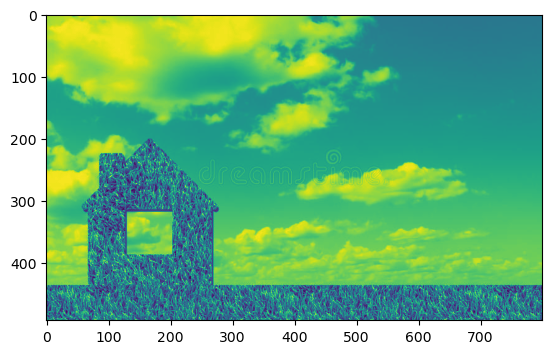

In [37]:
#importing modules and reading the image.
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('image.jpg',0)
plt.imshow(image)
plt.show()


In [16]:
unique_pixels = np.unique(image)
mid_val = unique_pixels[len(unique_pixels)//2]

In [17]:
ret, threshold = cv2.threshold(image,mid_val,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

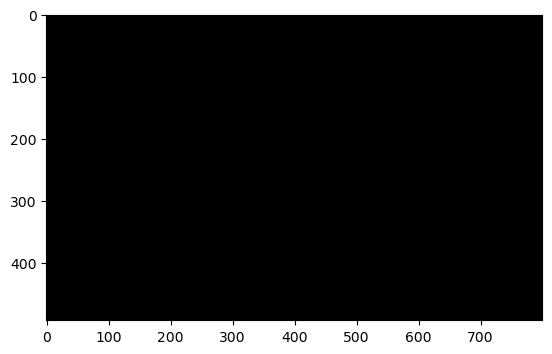

In [18]:
#to draw contours, we need a black image
black_image = np.zeros((image.shape[0],image.shape[1]))
plt.imshow(black_image,cmap='gray')
plt.show()

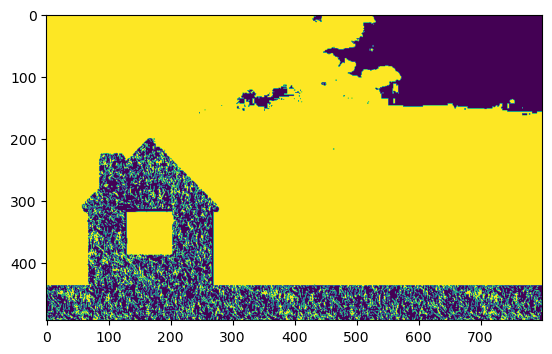

In [21]:
plt.imshow(threshold)

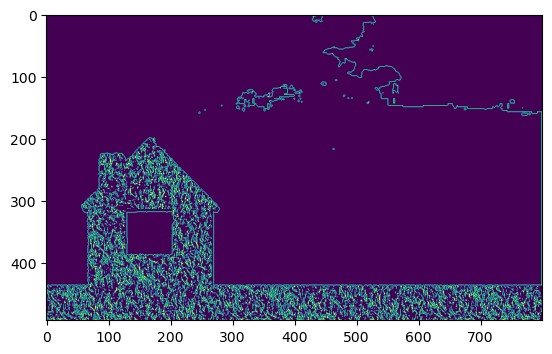

In [19]:
cv2.drawContours(black_image,contours,-1,(255,255,255),1)
plt.imshow(black_image)

#### Application
1. Hand gesture detection using contour detection.

In [29]:
cap_region_x_begin=0.5  # start point/total width
cap_region_y_end=0.8  # start point/total width
threshold = 2  #  BINARY threshold
blurValue = 41  # GaussianBlur parameter
bgSubThreshold = 50
learningRate = 0

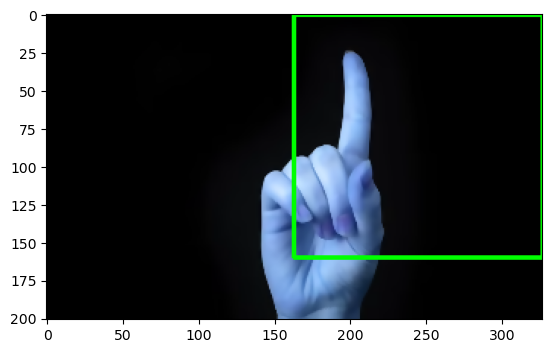

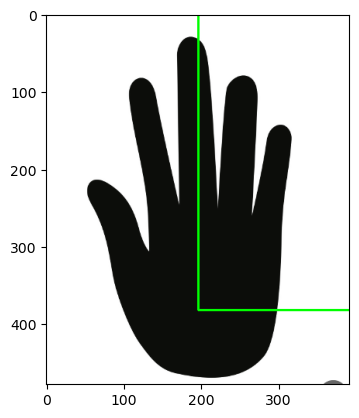

In [50]:
#loading sample gestures # one can replace them via video cam feed,too
one = cv2.imread('1.png')
five = cv2.imread('5.png')
#applying smoothing filter on the images
one = cv2.bilateralFilter(one,5,50,100)
five = cv2.bilateralFilter(five,5,50,100)
#flipping the frame horizontally
one = cv2.flip(one,1)
five = cv2.flip(five,1)
#drawing rects
cv2.rectangle(one, (int(cap_region_x_begin * one.shape[1]), 0),
                 (one.shape[1], int(cap_region_y_end * one.shape[0])), (0, 255, 0), 2)
cv2.rectangle(five, (int(cap_region_x_begin * five.shape[1]), 0),
                 (five.shape[1], int(cap_region_y_end * five.shape[0])), (0, 255, 0), 2)

plt.imshow(one)
plt.show()
plt.imshow(five)
plt.show()

In [53]:
#converting the image into gray scale and applying gaussian blurr followed by thresholding
gray_one = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)
blur_one = cv2.GaussianBlur(gray_one, (blurValue, blurValue), 0)
unique_1 = np.unique(blur_one)
mid_val_one = unique_1[len(unique_1)//2]

ret, thresh_one = cv2.threshold(blur_one, mid_val_one-10, 255, cv2.THRESH_BINARY)

gray_five = cv2.cvtColor(five, cv2.COLOR_BGR2GRAY)
blur_five = cv2.GaussianBlur(gray_five, (blurValue, blurValue), 0)
unique_2 = np.unique(blur_five)
mid_val_five = unique_2[len(unique_2)//2]
ret, thresh_five = cv2.threshold(blur_five, mid_val_five-10
                                 , 255, cv2.THRESH_BINARY_INV)

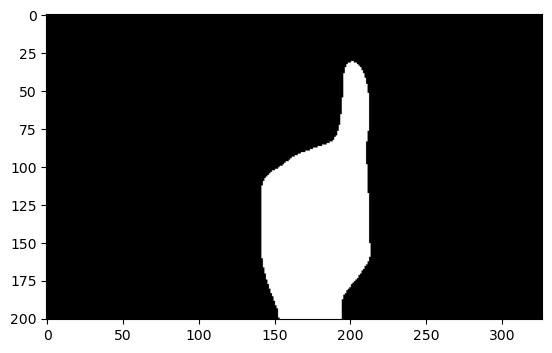

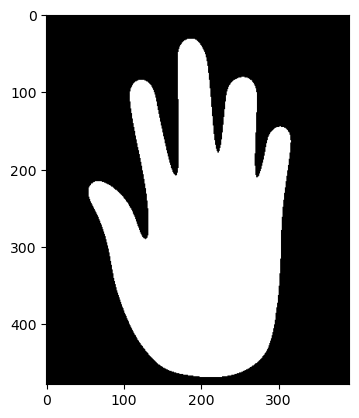

In [54]:
plt.imshow(thresh_one,cmap='gray')
plt.show()
plt.imshow(thresh_five,cmap='gray')
plt.show()

In [61]:
#helper function to calculate fingers
def calculateFingers(res,drawing):  # -> finished bool, cnt: finger count
    #  convexity defect
    hull = cv2.convexHull(res, returnPoints=False)
    if len(hull) > 0:
        defects = cv2.convexityDefects(res, hull)
        if type(defects) != type(None): 

            cnt = 0
            for i in range(defects.shape[0]):  # calculate the angle
                s, e, f, d = defects[i][0]
                start = tuple(res[s][0])
                end = tuple(res[e][0])
                far = tuple(res[f][0])
                a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
                b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
                c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
                angle = math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  # cosine theorem
                if angle <= math.pi / 2:  # angle less than 90 degree, treat as fingers
                    cnt += 1
                    cv2.circle(drawing, far, 8, [211, 84, 0], -1)
            return True, cnt
    return False, 0

0


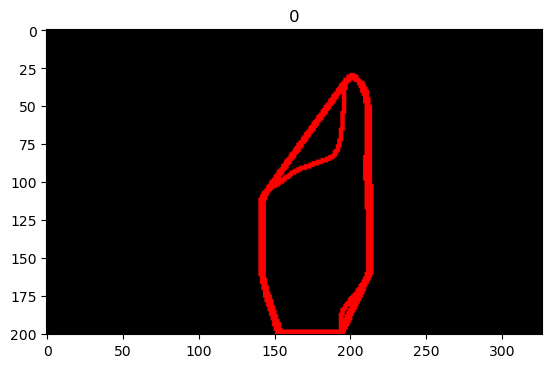

In [62]:
#getting the contours
contours_one,hierarchy = cv2.findContours(thresh_one,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
length = len(contours_one)

maxArea = -1
if length >0:
    for i in range(length):
        temp = contours_one[i]
        area = cv2.contourArea(temp)
        if area > maxArea:
            maxarea = area
            ci = i
    
    res = contours_one[ci]
    hull = cv2.convexHull(res)
    drawing = np.zeros(one.shape, np.uint8)
    cv2.drawContours(drawing, [res], 0,(255,0,0),2)
    cv2.drawContours(drawing,[hull],0,(255,0,0),3)

    finished, count = calculateFingers(res,drawing)
    print(count)


plt.imshow(drawing)
plt.title(count)
plt.show()


4


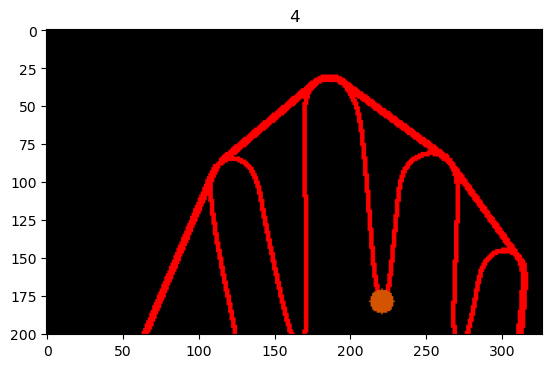

In [63]:
#getting the contours
contours_five,hierarchy = cv2.findContours(thresh_five,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
length = len(contours_five)

maxArea = -1
if length >0:
    for i in range(length):
        temp = contours_five[i]
        area = cv2.contourArea(temp)
        if area > maxArea:
            maxarea = area
            ci = i
    
    res = contours_five[ci]
    hull = cv2.convexHull(res)
    drawing = np.zeros(one.shape, np.uint8)
    cv2.drawContours(drawing, [res], 0,(255,0,0),2)
    cv2.drawContours(drawing,[hull],0,(255,0,0),3)

    finished, count = calculateFingers(res,drawing)
    print(count)


plt.imshow(drawing)
plt.title(count)
plt.show()